In [1]:
# !python3 -m pip install scikit-image

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.io import imread

In [3]:
df = pd.read_csv('age_gender.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'age_gender.csv'

In [24]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [25]:
len(df)

23705

In [26]:
df.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [27]:
df.pixels[0]

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1

In [28]:
type(df.pixels[0])

str

## convert the raw pixels from string to numpy arrays of shape (48 x 48)

In [ ]:
## your code here




In [29]:
df['pixels'] = df.pixels.apply(lambda x: x.split())
df['pixels'] = df.pixels.apply(lambda x: [eval(i) for i in x])
df['pixels'] = df.pixels.apply(lambda x: np.array(x).reshape((48,48)))

In [30]:
df['pixels']

0        [[129, 128, 128, 126, 127, 130, 133, 135, 139,...
1        [[164, 74, 111, 168, 169, 171, 175, 182, 184, ...
2        [[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116...
3        [[193, 197, 198, 200, 199, 200, 202, 203, 204,...
4        [[202, 205, 209, 210, 209, 209, 210, 211, 212,...
                               ...                        
23700    [[127, 100, 94, 81, 77, 77, 74, 99, 102, 98, 1...
23701    [[23, 28, 32, 35, 42, 47, 68, 85, 98, 103, 113...
23702    [[59, 50, 37, 40, 34, 19, 30, 101, 156, 170, 1...
23703    [[45, 108, 120, 156, 206, 197, 140, 180, 191, ...
23704    [[156, 161, 160, 165, 170, 173, 166, 177, 183,...
Name: pixels, Length: 23705, dtype: object

In [31]:
df.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [32]:
type(df.pixels[0])

numpy.ndarray

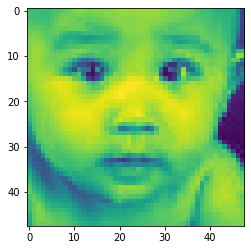

In [10]:
plt.imshow(df.pixels[0])

# exploration

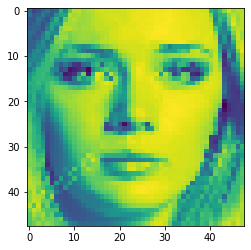

In [12]:
n = 1156
plt.imshow(df[df['ethnicity']==0].pixels.values[n]) #label0 = White

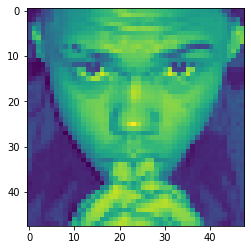

In [13]:
n = 150
plt.imshow(df[df['ethnicity']==1].pixels.values[n]) #label1 = African/American

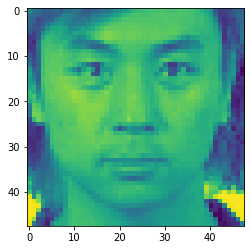

In [14]:
n = 1250
plt.imshow(df[df['ethnicity']==2].pixels.values[n]) #label2 = Asian

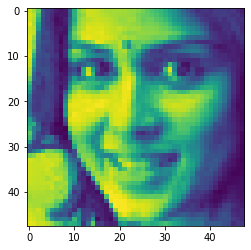

In [15]:
n = 1111
plt.imshow(df[df['ethnicity']==3].pixels.values[n]) #label3 = Indian

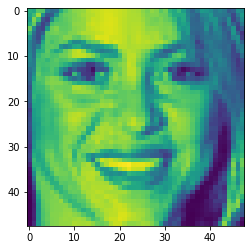

In [16]:
n = 1155
plt.imshow(df[df['ethnicity']==4].pixels.values[n]) #label4 = LAtin

# df.head()

<AxesSubplot:>

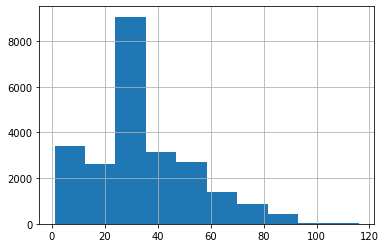

In [127]:
df.age.hist()

In [128]:
len(df)

23705

<AxesSubplot:>

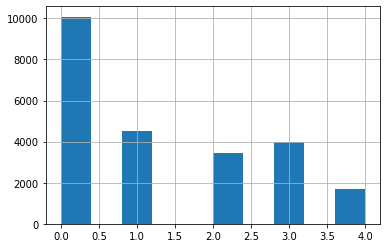

In [129]:
df.ethnicity.hist()

In [34]:
df.ethnicity.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [33]:
df.groupby('ethnicity').count()

,age,gender,img_name,pixels
ethnicity,,,,
0,10078,10078,10078,10078
1,4526,4526,4526,4526
2,3434,3434,3434,3434
3,3975,3975,3975,3975
4,1692,1692,1692,1692


In [35]:
df.gender.value_counts()/len(df)

0    0.522717
1    0.477283
Name: gender, dtype: float64

# features

## HOG

In [144]:
from skimage.feature import hog

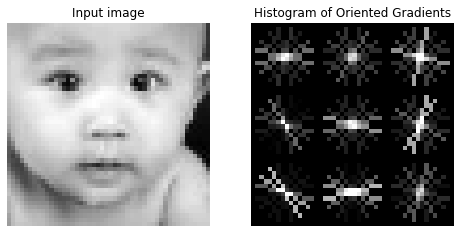

In [145]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = df.pixels[0]

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [146]:
hog_image_rescaled.shape

(48, 48)

In [147]:
def HOG(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_image_rescaled

In [148]:
df['HOG'] = df.pixels.apply(HOG)

In [149]:
df['HOG'].apply(lambda x: x.shape).value_counts()

(48, 48)    23705
Name: HOG, dtype: int64

## corner harris

In [ ]:
## your code here






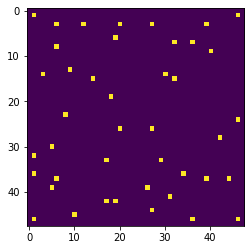

In [36]:
from skimage.feature import corner_harris, corner_peaks
square = df.pixels[0]
square
peaks = corner_peaks(corner_harris(square), min_distance=1, threshold_rel=0)
df['corner_harris'] = df.pixels.apply(lambda x: corner_peaks(corner_harris(x), min_distance=1, threshold_rel=0))

In [37]:
peaks

array([[46, 46],
       [46,  1],
       [ 1,  1],
       [14, 30],
       [15, 32],
       [15, 14],
       [ 1, 46],
       [28, 42],
       [13,  9],
       [46, 36],
       [26, 27],
       [36,  1],
       [26, 20],
       [33, 17],
       [32,  1],
       [45, 10],
       [42, 19],
       [33, 29],
       [42, 17],
       [37,  6],
       [39,  5],
       [37, 39],
       [ 7, 32],
       [ 8,  6],
       [ 9, 40],
       [41, 31],
       [ 6, 19],
       [39, 26],
       [44, 27],
       [ 3,  6],
       [14,  3],
       [30,  5],
       [36, 34],
       [ 3, 20],
       [19, 18],
       [ 7, 36],
       [37, 44],
       [24, 46],
       [ 3, 12],
       [ 3, 39],
       [ 3, 27],
       [23,  8]])

In [39]:
m = np.zeros((5,5))

In [40]:
m

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [41]:
m[[1,2],[1,1]] =3
m

array([[0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

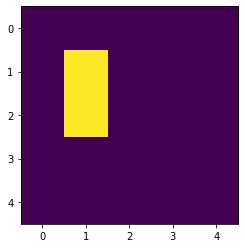

In [42]:
plt.imshow(m)

In [ ]:
def cornerHarris(peaks):
    
    ## create zeros numpy array with shape (48, 48)
    
    ## assign one to the peak points
    im = np.zeros((48,48))
    im[peaks[:, 0], peaks[:, 1]] = 1
    
    return im

df['corner_harris_image'] = df['corner_harris'].apply(cornerHarris)
plt.imshow(df.corner_harris_image[0])

## local binary pattern

In [150]:
from skimage.feature import local_binary_pattern

In [151]:
# help(local_binary_pattern)

In [152]:
# plt.hist(local_binary_pattern(image, 8*3, 3, method='default'))

In [153]:
lbp = local_binary_pattern(image, 8*3, 3, method='default')

In [154]:
lbp.shape

(48, 48)

In [155]:
df['LBP'] = df.pixels.apply(lambda x: local_binary_pattern(x, 8*3, 3, method='default'))

In [156]:
df['LBP'].apply(lambda x: x.shape).value_counts()

(48, 48)    23705
Name: LBP, dtype: int64

## hough transform

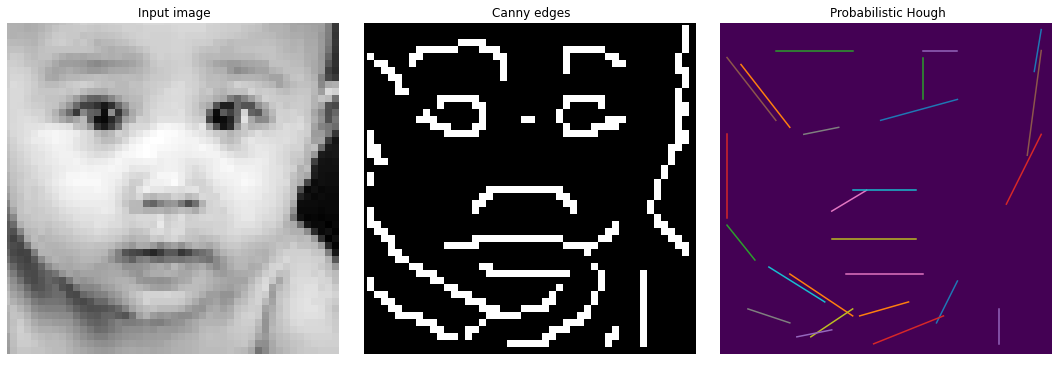

In [157]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from matplotlib import cm

# Line finding using the Probabilistic Hough Transform
image = df.pixels[0]
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)
# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()


ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')


ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')


ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')


for a in ax:
    a.set_axis_off()

    
plt.tight_layout()
plt.show()

In [158]:
# lines

In [159]:
# edges.shape

In [160]:
df['edges'] = df.pixels.apply(lambda x: canny(x, 2, 1, 25))

In [161]:
df['lines'] = df.edges.apply(lambda x: probabilistic_hough_line(x, threshold=10, line_length=5, line_gap=3))

# grouping the features

**flattening**

In [162]:
df['corner_harris_image'] = df['corner_harris_image'].apply(lambda x: x.flatten())
df['HOG'] = df['HOG'].apply(lambda x: x.flatten())
df['LBP'] = df['LBP'].apply(lambda x: x.flatten())
df['edges'] = df.edges.apply(lambda x: x.flatten())

In [163]:
df.edges[0]

array([False, False, False, ..., False, False, False])

In [164]:
m = { True: 1, False:0}

In [165]:
df.edges = df.edges.apply(lambda x: np.array([m.get(X) for X in x]))

In [166]:
# df.edges[0]

In [167]:
df.head()

,age,ethnicity,gender,img_name,pixels,corner_harris,corner_harris_image,HOG,LBP,edges,lines
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,...","[[46, 46], [46, 1], [1, 1], [14, 30], [15, 32]...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3932160.0, 4063232.0, 16711681.0, 16773121.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[((24, 31), (16, 31)), ((17, 12), (11, 11)), (..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ...","[[46, 1], [46, 46], [36, 46], [1, 2], [46, 32]...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8650753.0, 16711681.0, 16613377.0, 16515073.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[((8, 4), (29, 4)), ((13, 26), (23, 22)), ((39..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116...","[[1, 46], [15, 16], [15, 32], [13, 32], [46, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[14680065.0, 7340032.0, 1048576.0, 16515073.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[((37, 38), (32, 33)), ((28, 43), (9, 41)), ((..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,...","[[46, 46], [1, 46], [1, 1], [46, 1], [14, 31],...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[16515073.0, 16646145.0, 16646145.0, 16515073....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[((31, 26), (25, 24)), ((30, 16), (36, 16)), (..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,...","[[1, 1], [46, 1], [1, 43], [46, 46], [33, 16],...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[16515073.0, 16646145.0, 15728641.0, 1.0, 1664...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[((30, 46), (14, 45)), ((45, 23), (45, 18)), (..."


**grouping**

In [168]:
features = df[['corner_harris_image', 'HOG', 'LBP', 'edges']].values

In [169]:
np.hstack(([features[0][0], features[0][1], features[0][2], features[0][3]]))

array([0., 0., 0., ..., 0., 0., 0.])

In [170]:
features = np.array([np.hstack(([features[i][j] for j in range(4)])) for i in range(len(features))])

In [171]:
features.shape

(23705, 9216)

In [172]:
age  = df.age.values

In [173]:
ethnicity = df.ethnicity.values

In [174]:
gender = df.gender.values

# **training**

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
## your code here

def trainMLP(x, y, h = (100)):

    ## train, test split
    
    
    ## initiate the classifier and train with train data
    
    
    ## get the train and test scores
    
    
    ## get the test predictions
    
    
    ## confusion matrix
    
    
    ## classification report
    
    
    
    return mlp_classifier, train_score, test_score, Confusion_Matrix , Classification_Report

In [209]:
def trainMLP(x, y, h = (100)):
    X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=1)
    
    
    mlp = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=h)
    
    mlp.fit(X_train, y_train)
    train_score = mlp.score(X_train, y_train)
    test_score  = mlp.score(X_test, y_test)
    test_preds = mlp.predict(X_test)
    conf = confusion_matrix(y_test, test_preds)
    report =  classification_report(y_test, test_preds)
    return mlp, train_score, test_score, conf , report

In [ ]:
def trainMLPRegressor(x, y, h = (100)):
     ## train, test split
    
    
    ## initiate the regressor and train with train data
    
    
    ## get the train and test scores
    
    
    ## get the test predictions
    
    
    
    return mlp_regressor, train_score, test_score

In [213]:
def trainMLPRegressor(x, y, h = (100)):
    X_train, X_test, y_train, y_test = train_test_split(x, y,  random_state=1)
    mlp = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=h)
    mlp.fit(X_train, y_train)
    train_score = mlp.score(X_train, y_train)
    test_score  = mlp.score(X_test, y_test)
    return mlp, train_score, test_score

In [285]:
help(MLPRegressor.score)


Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : array-like of shape (n

## **gender**

### Raw pixels

In [70]:
raw_pixels = df.pixels.apply(lambda x: x.flatten()).values

In [71]:
raw_pixels = np.array([x for x in raw_pixels])

In [72]:
raw_pixels

array([[129, 128, 128, ..., 146, 146, 146],
       [164,  74, 111, ..., 182, 170, 148],
       [ 67,  70,  71, ..., 112, 111, 108],
       ...,
       [ 59,  50,  37, ...,  98,  78,  78],
       [ 45, 108, 120, ...,  32,  35,  35],
       [156, 161, 160, ..., 190, 184, 174]])

In [73]:
gender_clf , gender_train_score, gender_test_score, gender_confusion_matrix, gender_classification_report = trainMLP(raw_pixels, gender)

In [ ]:
gender_train_score, gender_test_score

In [ ]:
gender_confusion_matrix

In [ ]:
print(gender_classification_report)

### LBP

In [85]:
LBP = df['LBP'].values
LBP = np.array([l for l in LBP])

In [96]:
gender_clf_LBP , gender_train_score_LBP,\
gender_test_score_LBP, gender_confusion_matrix_LBP,\
gender_classification_report_LBP = trainMLP(LBP, gender, (100,70,30))

In [ ]:
gender_train_score_LBP, gender_test_score_LBP

In [ ]:
gender_confusion_matrix_LBP

In [ ]:
print(gender_classification_report_LBP)

### HOG

In [192]:
HOG = df['HOG'].values
HOG = np.array([l for l in HOG])

In [101]:
gender_clf_HOG , gender_train_score_HOG,\
gender_test_score_HOG, gender_confusion_matrix_HOG,\
gender_classification_report_HOG = trainMLP(HOG, gender, (30,70,30))

In [ ]:
gender_train_score_HOG, gender_test_score_HOG

In [ ]:
gender_confusion_matrix_HOG

In [ ]:
print(gender_classification_report_HOG)

### edges

In [176]:
edges = df['edges'].values
edges = np.array([l for l in edges])

In [177]:
gender_clf_edges , gender_train_score_edges,\
gender_test_score_edges, gender_confusion_matrix_edges,\
gender_classification_report_edges = trainMLP(edges, gender, (30,70,30))

In [ ]:
gender_train_score_edges, gender_test_score_edges

In [ ]:
gender_confusion_matrix_edges

In [ ]:
print(gender_classification_report_edges)

## **ethnicity**

### Raw pixels

In [181]:
ethnicity_clf , ethnicity_train_score,\
ethnicity_test_score, ethnicity_confusion_matrix,\
ethnicity_classification_report = trainMLP(raw_pixels, ethnicity, (100,70,30))

In [ ]:
ethnicity_train_score, ethnicity_test_score

In [ ]:
ethnicity_confusion_matrix

In [ ]:
print(ethnicity_classification_report)

### LBP

In [185]:
ethnicity_clf_LBP , ethnicity_train_score_LBP,\
ethnicity_test_score_LBP, ethnicity_confusion_matrix_LBP,\
ethnicity_classification_report_LBP = trainMLP(LBP, ethnicity, (100,70,30))

In [ ]:
ethnicity_train_score_LBP, ethnicity_test_score_LBP

In [ ]:
ethnicity_confusion_matrix_LBP

In [ ]:
print(ethnicity_classification_report_LBP)

### HOG

In [193]:
HOG

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
ethnicity_clf_HOG , ethnicity_train_score_HOG,\
ethnicity_test_score_HOG, ethnicity_confusion_matrix_HOG,\
ethnicity_classification_report_HOG = trainMLP(HOG, ethnicity, (100,70,30))

In [ ]:
ethnicity_train_score_HOG, ethnicity_test_score_HOG

In [ ]:
ethnicity_confusion_matrix_HOG

In [ ]:
print(ethnicity_classification_report_HOG)

### edges

In [198]:
ethnicity_clf_edges , ethnicity_train_score_edges,\
ethnicity_test_score_edges, ethnicity_confusion_matrix_edges,\
ethnicity_classification_report_edges = trainMLP(edges, ethnicity, (100,70,30))

In [ ]:
ethnicity_train_score_edges, ethnicity_test_score_edges

In [ ]:
ethnicity_confusion_matrix_edges

In [ ]:
print(ethnicity_classification_report_edges)

## **Age**

### Raw pixels

In [228]:
Age_clf , Age_train_score, Age_test_score = trainMLPRegressor(raw_pixels, age)

In [ ]:
Age_train_score, Age_test_score

### LBP

In [ ]:
Age_clf_LBP , Age_train_score_LBP, Age_test_score_LBP = trainMLPRegressor(LBP, age)

In [ ]:
Age_train_score_LBP, Age_test_score_LBP

### HOG

In [232]:
Age_clf_HOG, Age_train_score_HOG, Age_test_score_HOG = trainMLPRegressor(HOG, age)

In [ ]:
Age_train_score_HOG, Age_test_score_HOG

### edges

In [234]:
Age_clf_edges, Age_train_score_edges, Age_test_score_edges = trainMLPRegressor(edges, age)

In [ ]:
Age_train_score_edges, Age_test_score_edges